In [1]:
# KMEANS

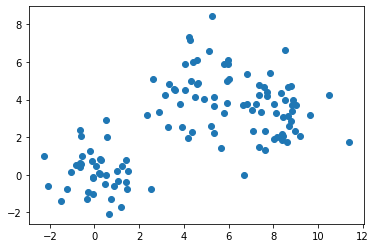

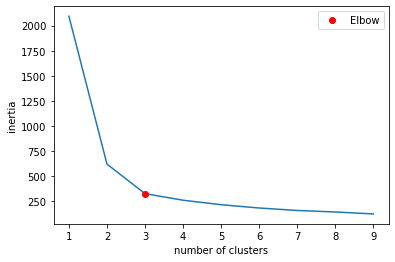

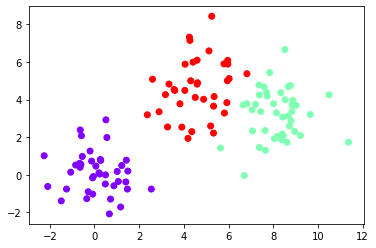

,x,y,Cluster
0,-2.089247,-0.618894,0
1,-1.062846,0.142815,0
2,-0.127795,0.730463,0
3,-0.583067,2.079222,0
4,1.475487,-0.756655,0
...,...,...,...
115,8.621306,1.730378,1
116,10.502291,4.255259,1
117,8.020737,3.780250,1
118,9.658212,3.206694,1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# jumlah sampel setiap klaster
MAXN = 40
data = np.concatenate([1.25*np.random.randn(MAXN, 2), 5 + 1.5*np.random.randn(MAXN, 2)])
data = np.concatenate([data, [8, 3] + 1.2*np.random.randn(MAXN, 2)])
df = pd.DataFrame(data={
    'x':data[:, 0],
    'y':data[:, 1],
})
plt.scatter(df['x'], df['y'])
plt.show()
df.head()

# tentukan centroid dengan elbow method
new_df = df.copy()
inertia = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)
    
#     jika sudah menentukan elbow
    if i == 3:
        elbow = kmeans.inertia_
        
number_of_clusters = range(1, 10)
plt.plot(number_of_clusters, inertia)

plt.plot(3, elbow, 'ro', label="Elbow") #jika sudah menentukan elbow
plt.legend() #jika sudah menentukan elbow

plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

# kmeans
kmeans = KMeans(init = 'KMeans++', n_clusters = 3)
kmeans = KMeans(init = 'random', n_clusters = 3)

cluster = kmeans.fit_predict(df)
plt.scatter(df['x'], df['y'], c = cluster, cmap='rainbow')
plt.show()

labels = kmeans.labels_
labels

df_cluster = pd.concat([df, pd.DataFrame({'Cluster':labels})], axis = 1)
df_cluster

# DBSCAN

In [25]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

#set up DBSCAN
cluster_dbscan = DBSCAN(eps=0.5, min_samples=5)

#fit the data
cluster_dbscan.fit(df)
                  
#store label generated from dbscan
labels2 = cluster_dbscan.labels_

#label= -1, artinya the point is outlier
print(labels2)

#creating a numpy array with all values set to false by default
core_samples_mask = np.zeros_like(labels2, dtype=bool)

#setting core and border points (all points that are not -1) to True
core_samples_mask[cluster_dbscan.core_sample_indices_] = True
 
#finding the number of clusters in labels (ingnoring noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels2 else 0)
n_noise_ = list(labels).count(-1)

#printing the number of clusters and number of noise points (outliers)
print("estimated number of clusters: %d" % n_clusters_)
print("estimated number of noise points: %d" % n_noise_)

#evaluating the quality of clusters, higher silhouette is better (-1 to 1, 0 = overlap clusters)
s = metrics.silhouette_score(df, cluster_dbscan.labels_)
print(f"Silhouette Coefficient for the Dataset Clusters: {s:.2f}")

plt.scatter(df['x'], df['y'], c=labels, cmap='rainbow')
plt.show()

df_cluster_DBSCAN = pd.concat([df, pd.DataFrame(['Cluster':labels2])], axis=1)
df_cluster_DBSCAN

SyntaxError: invalid syntax (<ipython-input-25-010bbfb561c8>, line 37)

In [4]:
df

,x,y
0,-2.089247,-0.618894
1,-1.062846,0.142815
2,-0.127795,0.730463
3,-0.583067,2.079222
4,1.475487,-0.756655
...,...,...
115,8.621306,1.730378
116,10.502291,4.255259
117,8.020737,3.780250
118,9.658212,3.206694


In [6]:
df_cluster_DBSCAN = pd.concat([df, pd.DataFrame({"Cluster": labels2})],axis=1)
df_cluster_DBSCAN

,x,y,Cluster
0,-2.089247,-0.618894,-1
1,-1.062846,0.142815,0
2,-0.127795,0.730463,0
3,-0.583067,2.079222,-1
4,1.475487,-0.756655,-1
...,...,...,...
115,8.621306,1.730378,2
116,10.502291,4.255259,-1
117,8.020737,3.780250,-1
118,9.658212,3.206694,-1
